# Covid-19 data
We load in the dataset of covid-19 stats from all countries in the world by week from this site, which has data by country for many topics, not just covid-19
* [Our World in Data](https://ourworldindata.org/)

and the covid-19 data is available from this github site:
* [owid](https://github.com/owid/covid-19-data/tree/master/public/data/)

This notebook gives another example of using pandas to quickly get information from a large dataset,
in this case a dataset with 67 columns and 164,709 rows of data about covid-19 over time in all countries of the world.


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read the data into a data frame

In [3]:
df = pd.read_csv('data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164705,ZWE,Africa,Zimbabwe,2022-02-22,233980.0,409.0,339.571,5388.0,2.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164706,ZWE,Africa,Zimbabwe,2022-02-23,234589.0,609.0,339.429,5388.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164707,ZWE,Africa,Zimbabwe,2022-02-24,234967.0,378.0,338.429,5390.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164708,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Look at all of the columns

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.616940e+05,1.616400e+05,1.604890e+05,1.439190e+05,144069.000000,143939.000000,160943.000000,160889.000000,159743.000000,143181.000000,...,105025.000000,103584.000000,67904.000000,122471.000000,153753.000000,134927.000000,5.662000e+03,5662.000000,5662.000000,5662.000000
mean,2.479807e+06,1.138018e+04,1.133312e+04,5.705770e+04,171.301980,170.612617,28575.590102,162.567560,161.165890,502.840549,...,10.627752,32.777677,50.793782,3.028089,73.576753,0.725612,3.742413e+04,9.375304,15.970030,965.191533
std,1.502952e+07,8.355096e+04,8.148945e+04,2.990449e+05,834.547801,812.434908,49750.441626,673.594813,519.437712,776.717241,...,10.559208,13.522681,31.812631,2.450402,7.492071,0.149968,1.036478e+05,16.430009,30.143799,1410.959757
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-3933.000000,-361.000000,0.001000,-13876.282000,-1936.106000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.950000e+03,1.000000e+00,6.714000e+00,7.800000e+01,0.000000,0.143000,610.760500,0.041000,1.592000,18.282000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.575000e+01,-0.730000,-0.750000,-29.874241
50%,2.552400e+04,7.900000e+01,1.051430e+02,7.720000e+02,2.000000,2.429000,4632.622000,11.340000,18.406000,124.671000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.400100e+03,6.035000,7.195000,469.752152
75%,2.916692e+05,1.053000e+03,1.125714e+03,7.214000e+03,20.000000,20.714000,36793.616000,100.112000,118.525500,698.243000,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.451072e+04,14.500000,22.882500,1650.520674
max,4.342474e+08,4.235024e+06,3.437210e+06,5.944313e+06,18057.000000,14705.714000,684769.535000,51427.491000,16052.608000,6307.275000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.730000,8951.020458


# plot one column for one country
Here is a direct way to plot the people_vaccinated_per_hundred data for the USA,
but this isn't the best way as it uses the original indices instead of the date.

In [6]:
df2 = df[df['iso_code']=='USA']  # select out just those rows with iso_code = USA
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
155697,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
155698,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
155699,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
155700,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
155701,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-8925.0,-3.59,-2.63,-26.808639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156459,USA,North America,United States,2022-02-22,78648693.0,90495.0,84220.571,939064.0,2107.0,1821.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
156460,USA,North America,United States,2022-02-23,78733498.0,84805.0,79870.857,941889.0,2825.0,1782.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
156461,USA,North America,United States,2022-02-24,78798989.0,65491.0,74750.286,944830.0,2941.0,1742.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
156462,USA,North America,United States,2022-02-25,78883101.0,84112.0,65927.571,947417.0,2587.0,1760.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [7]:
df2['people_vaccinated_per_hundred']

155697      NaN
155698      NaN
155699      NaN
155700      NaN
155701      NaN
          ...  
156459    76.28
156460    76.30
156461    76.32
156462    76.32
156463    76.32
Name: people_vaccinated_per_hundred, Length: 767, dtype: float64

<AxesSubplot:>

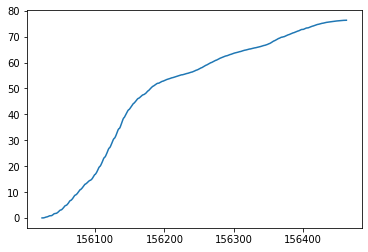

In [8]:
df2['people_vaccinated_per_hundred'].plot()

# print the unique locations

In [9]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

# Create a pivot table
index is the date, and columns are the values in the location column
the value is the people_vaccinated_per_hundred.
We can then plot just the columns we want!

In [10]:
column = 'new_deaths_smoothed_per_million'

df2 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df2




location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,0.233,0.276,1.541,0.189,1.847,0.0,0.0,1.447,3.236,7.364,...,4.550,0.067,0.0,0.299,0.815,0.0,1.225,0.080,0.053,0.133
2022-02-23,0.219,0.274,1.492,0.173,1.847,0.0,0.0,0.000,3.164,7.171,...,4.058,0.063,0.0,0.299,0.851,0.0,1.199,0.080,0.060,0.085
2022-02-24,0.194,0.228,1.343,0.154,1.847,0.0,0.0,0.000,2.970,6.690,...,3.853,0.059,0.0,0.264,0.882,0.0,1.164,0.075,0.045,0.085


# Plot the columns we want!

In [11]:
df2[['United States','Ukraine','Russia']]

location,United States,Ukraine,Russia
date,,,
2020-01-28,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
...,...,...,...
2022-02-22,5.470,5.775,5.205
2022-02-23,5.355,5.738,5.239
2022-02-24,5.233,5.788,5.214


Text(0.5, 1.0, 'new_deaths_smoothed_per_million')

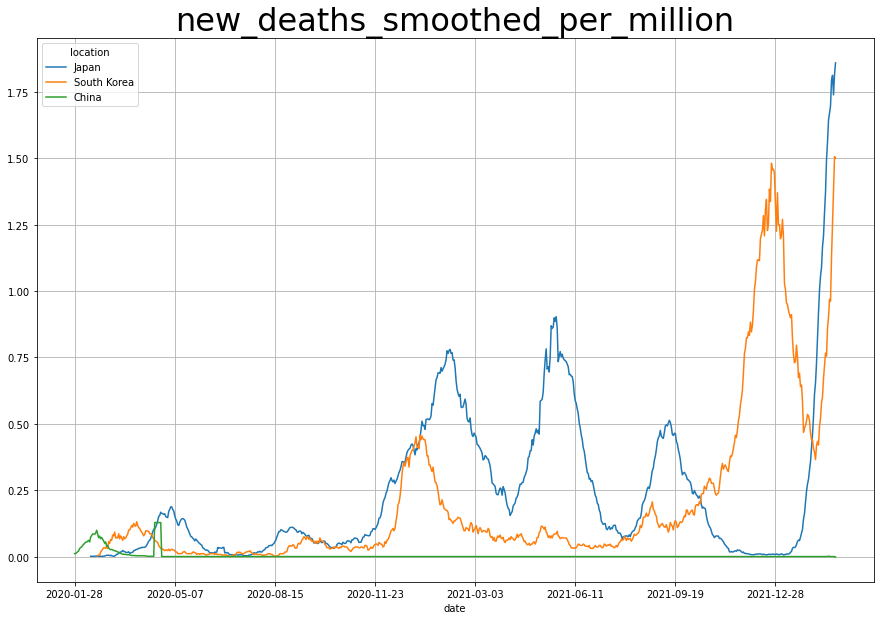

In [12]:
df2[['Japan','South Korea','China']].plot(figsize=(15,10))
plt.grid()
plt.title(column,fontsize=32)

# Plot new deaths for all countries

'done'

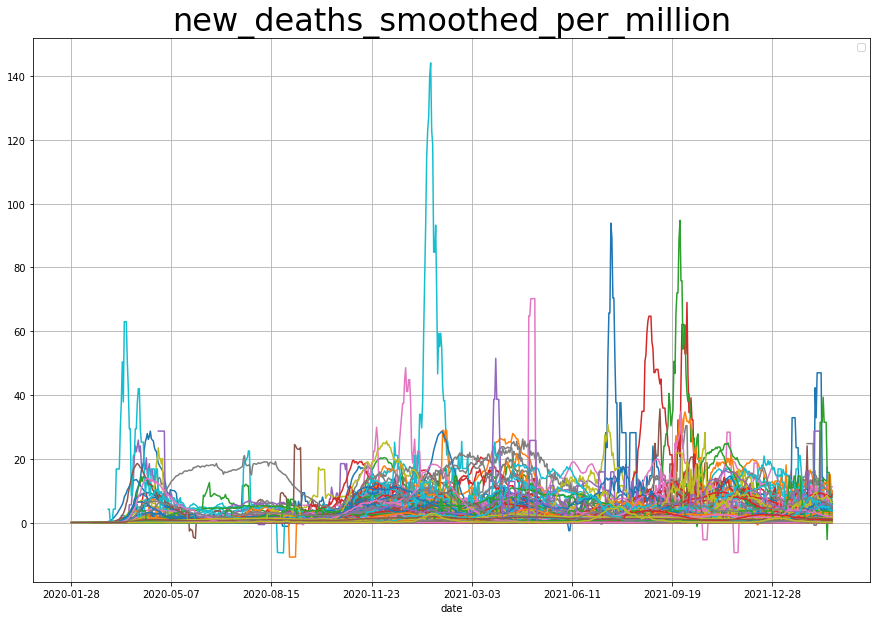

In [13]:
df2.plot(figsize=(15,10))
plt.grid()
plt.title(column,fontsize=32)
plt.legend([])
'done'

# Aggregation
Lets generate plots for the continents using aggretation!
Say, new_deaths_smoothed, aggregated over continents by date.


<Figure size 1440x1440 with 0 Axes>

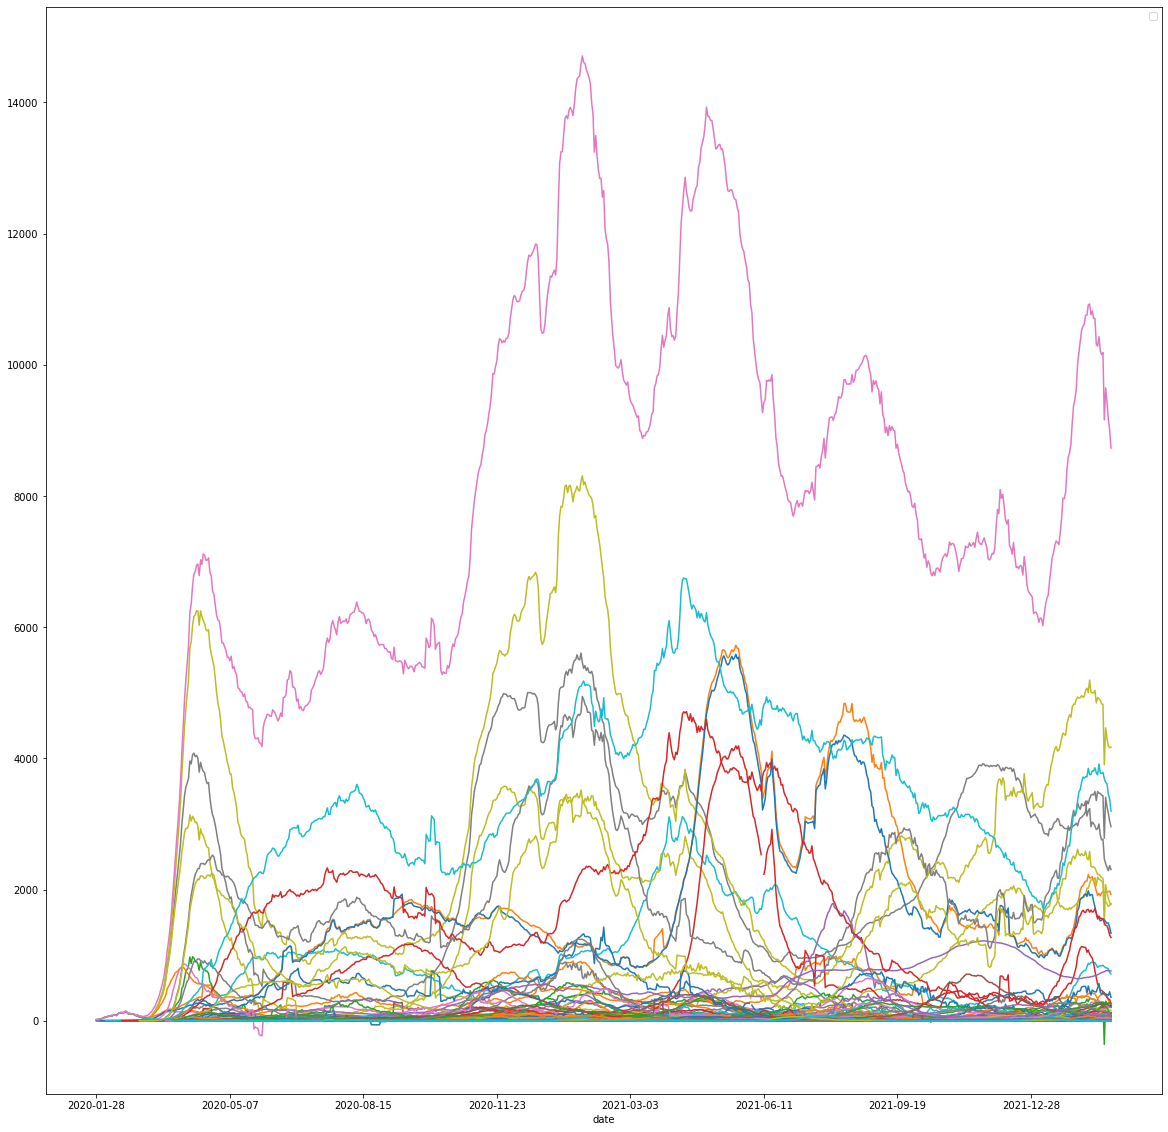

In [17]:
column = 'new_deaths_smoothed'
plt.figure(figsize=(20,20))
df3 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df3.plot(figsize=(20,20))
plt.legend([])


# Plot the total worldwide deaths

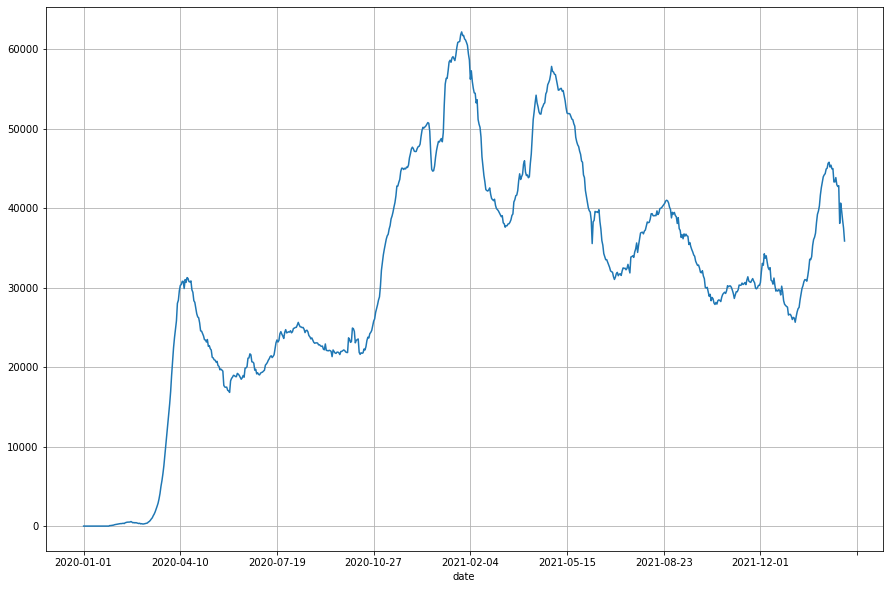

In [40]:
df4 = df.groupby(['date']).new_deaths_smoothed.agg(sum)
df4.plot(figsize=(15,10))
plt.grid()

# Plot the deaths on each continent

In [47]:
continents = df['continent'].unique()
continents

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

<Figure size 1440x360 with 0 Axes>

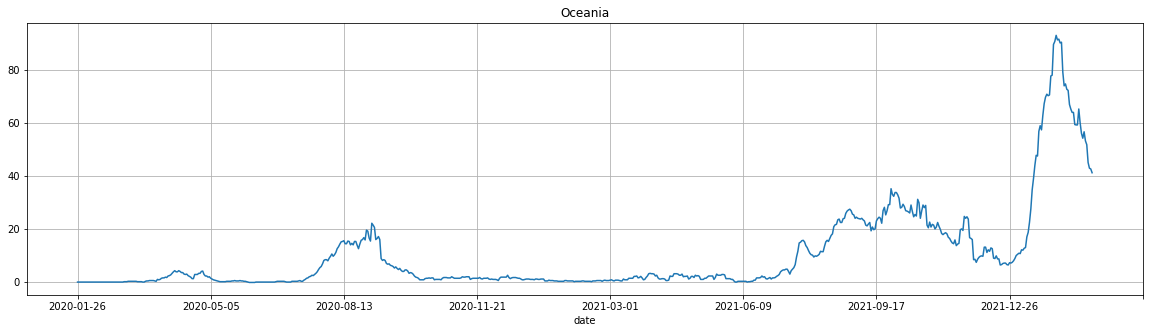

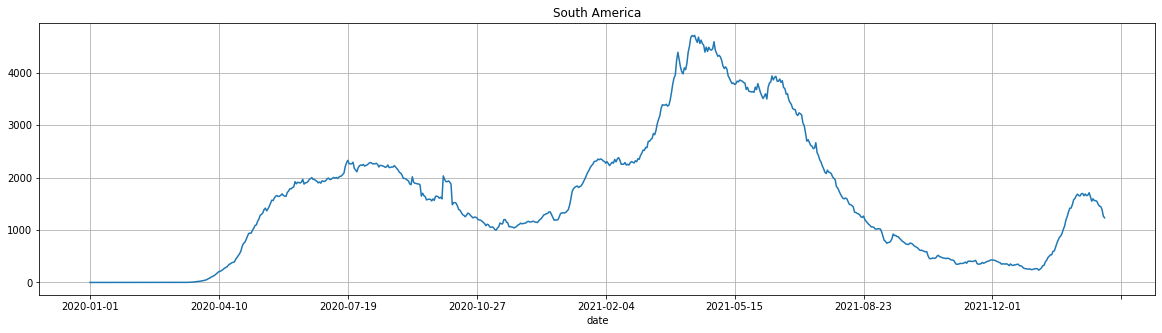

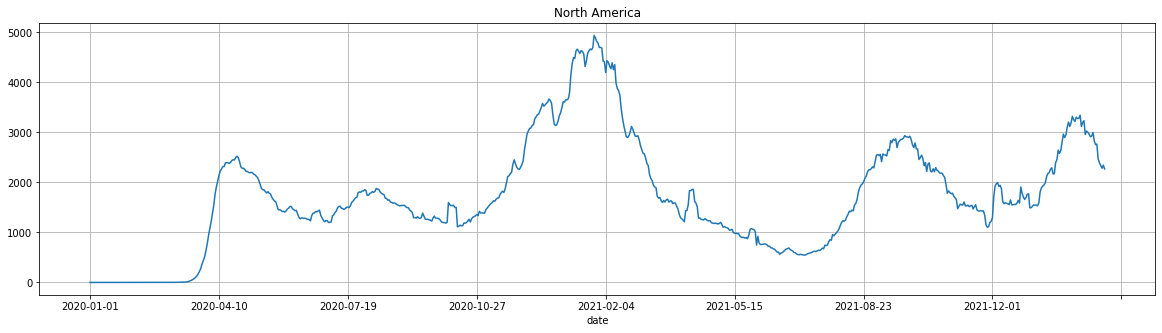

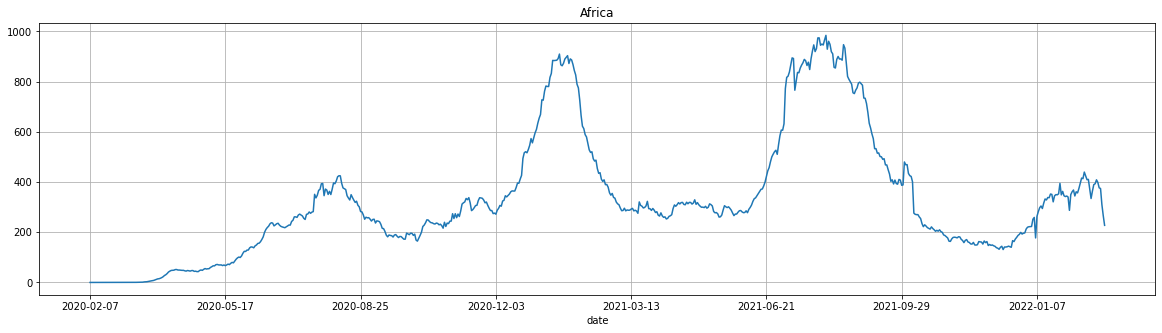

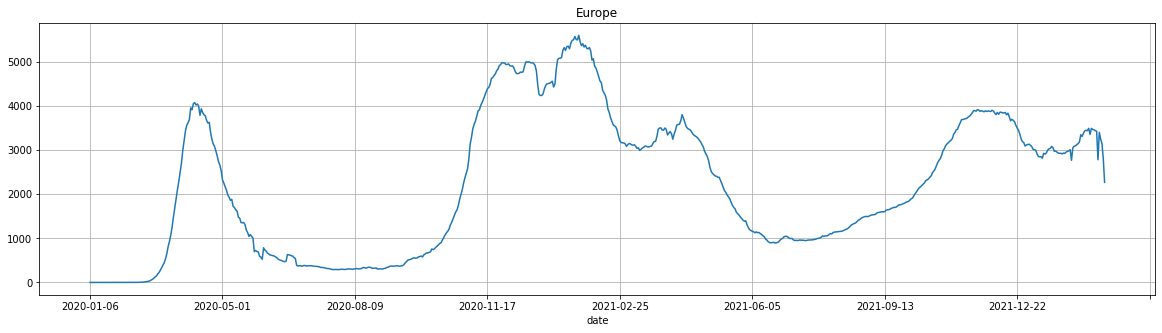

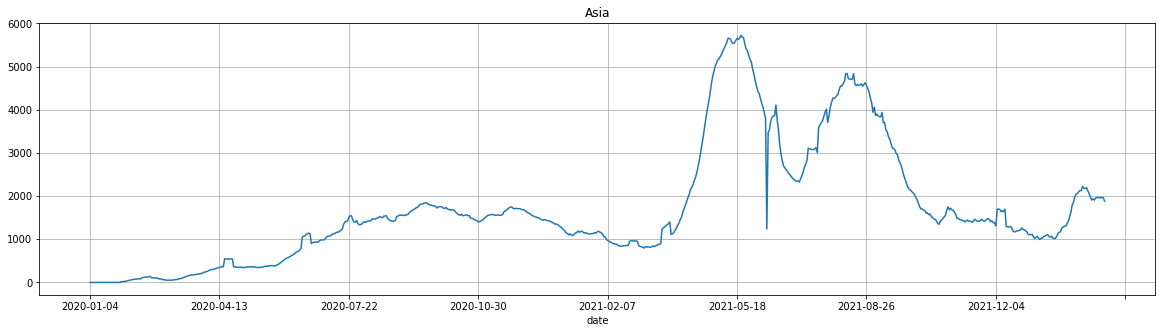

In [71]:
plt.figure(figsize=(20,5))
for continent in continents[::-1]:
    if str(continent)=='nan':
           continue
    plt.figure(figsize=(20,5))
    df6 = df[df['continent']==continent]
    new_deaths = df6.groupby(['date']).new_deaths_smoothed.agg(sum)
    new_deaths.plot(label=continent)
    plt.title(continent)
    plt.grid()
    #plt.plot(new_deaths.index,new_deaths,label=continent)
